<H3 align='center'> Pregunta investigación - Autoencoders </H3>
<hr style="height:2px;border:none"/>

**Integrantes:** \\

**Daniel Peralta**  -  201621053-9 \\
**Philip Guerra**   -  201623003-3


El siguiente trabajo realizado es original y realizado en conformidad con el código de honor de la Universidad.

La distribución del trabajo se realizo de la siguiente manera, Daniel Peralta se encargó de la realización de la pregunta de investigación, mientras que Philip Guerra se encargó de la realización del challenge de kaggle. Si bien nos dividimos el trabajo de la manera antes mencionada, nos complementamos en gran parte del trabajo, en la realización de resultados y conclusiones.

Para este trabajo se ha seleccionado la pregunta de investigación:

**Auto-encoders**: Un autoencoder simétrico (la arquitectura del encoder es espejo del encoder) es más efectivo para aprender una representación que un autoencoder asimétrico. Esto vale tanto para arquitecturas densas como convolucionales. 

Para refutar o demostrar la pregunta de investigación, se han utilizado tres datasets. 

*   El primer dataset sintético utilizado corresponde al MNIST, se compone de imágenes de números manuscritos del 0 al 9, para poder identificar que tipo de número se encuentra en cada imagen. [Link del dataset](https://keras.io/api/datasets/mnist/)

*   El segundo dataset sintético utilizado corresponde al Fashion MNIST, se compone de imágenes de prendas de vestir, para poder identificar que tipo de prenda corresponde a cada imagen. [Link del dataset](https://keras.io/api/datasets/fashion_mnist/)

*   El último dataset sintético corresponde al CIFAR10, que es ampliamente utilizado para probar nuevos métodos en redes neuronales, este se compone de 50k imágenes de entrenamiento y 10k de imágenes de test en 10 clases. [Link del dataset](https://keras.io/api/datasets/cifar10/)

Toda la información utilizada en este trabajo se encontrará en el siguiente [link](https://usmcl-my.sharepoint.com/personal/philip_guerra_sansano_usm_cl/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fphilip%5Fguerra%5Fsansano%5Fusm%5Fcl%2FDocuments%2F2021%2D1%2FRedes%20neuronales%2FTaller%203&originalPath=aHR0cHM6Ly91c21jbC1teS5zaGFyZXBvaW50LmNvbS86ZjovZy9wZXJzb25hbC9waGlsaXBfZ3VlcnJhX3NhbnNhbm9fdXNtX2NsL0VudlR3TnBZZ0oxRGxRanYtdEtxbWJvQk5DbE1HZ0xUQ3FoakMzelBiTnBOU0E%5FcnRpbWU9RU1aTTNnUmcyVWc)




# Auto-encoders

De forma simplificada se tiene que, un autoencoder es una red neuronal que está entrenada para intentar copiar su entrada a su salida. Internamente, tiene una capa oculta ***h*** que describe un código utilizado para representar la entrada. Se puede considerar que la red consta de dos partes: una función de codificador ***h = f (x)*** y un decodificador que produce una reconstrucción ***r = g (h)***. Esta arquitectura se presenta en la siguiente figura.

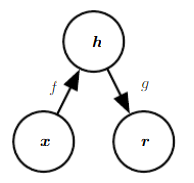

La idea de los autocodificadores ha sido parte del panorama histórico de las redes neuronales durante décadas. Tradicionalmente, los codificadores automáticos se usaban para la reducción de la dimensionalidad o el aprendizaje de características. Recientemente, las conexiones teóricas entre los codificadores automáticos y los modelos de variables latentes han llevado a los codificadores automáticos a la vanguardia del modelado generativo

Se realiza la importación de librerías y funciones a utilizar

In [1]:
#
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


#Para trabajar sobre imagenes
import cv2
import random
import os
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

#datatime
import datetime as dt

#tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

# Dataset MNIST

11493376/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


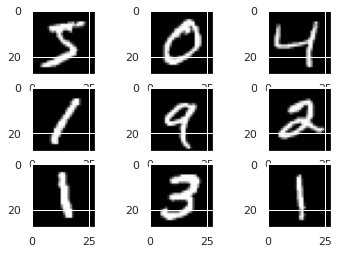

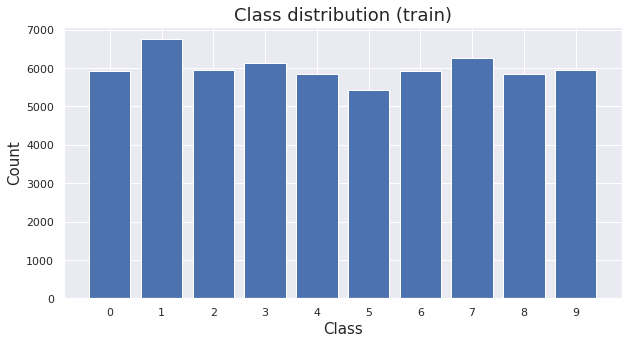

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
targetsShow = y_test
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train2 = X_train.reshape((-1, 28, 28, 1))
X_test2 = X_test.reshape((-1, 28, 28, 1))

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

#escalamos las imágenes de 0 a 1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


from matplotlib import pyplot
for i in range(9):	
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train2[i][:,:,-1], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# distribucion de ejemplos de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
fig = plt.figure(figsize=(10, 5))
y_pos = np.arange(len(unique))

# Create bars
plt.bar(y_pos, counts)
plt.xticks(y_pos, unique)

plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Class distribution (train)", fontsize=18)
plt.show()


Existe un pequeño desbalance en las distintas clases. Es ideal poder balancear el conjunto de entrenamiento, pero como el próposito del estudio es comparar el desempeño de un Auto-encoder simétrico con uno asimétrico se omitirá este paso.

En primera instancia se trabajará con arquitecturas densas para luego pasar a analizar una arquitectura convolucional. Para ambos se usarán funciones que implementen el encoder y decoder por separado, de esta forma se vuelve más facil pasar de una arquitectura simétrica a una asimétrica. 

## Arquitectura Densa

Para esta arquitectura, es necesario emplear una capa *Flatten()*, mientras que para la salida es necesario reconstruir la imagen con identica dimensión, por lo que se utilizará una capa *Reshape()*. La cantidad de capas vendrá dado por el tipo de Auto-encoder que se desea explorar.

### Modelo simétrico

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape

class Autoencoder:
  def __call__(self, shape, E_neu, D_neu, seed=1234):
    tf.random.set_seed(seed)
    self.shape = shape 
    encoder = self.FunEncoder(E_neu)
    decoder = self.FunDecoder(D_neu)
    inputs  = keras.Input(shape=(shape[0],shape[1],))
    x = encoder(inputs)
    x = decoder(x)
    return Model(inputs=inputs, outputs=x)

  def FunEncoder(self, neu=[1024, 512, 256]):
    inputs  = keras.Input(shape=(self.shape[0],self.shape[1],))
    hidden  = Flatten()(inputs)
    for n in neu[:-1]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(neu[-1], activation= 'relu')(hidden)
    return Model(inputs, output)

  def FunDecoder(self, neu=[256, 512, 1024]):
    inputs  = keras.Input(shape=(neu[0],))
    hidden  = Dense(neu[1], activation= 'relu')(inputs)
    for n in neu[2:]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(self.shape[0]*self.shape[1], activation= 'sigmoid')(hidden)
    output  = Reshape(self.shape)(output)
    return Model(inputs, output)
autoencoder = Autoencoder()([28,28], [1024, 512, 256], [256, 512, 1024])
autoencoder.summary()

Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
model_33 (Functional)        (None, 256)               1459968   
_________________________________________________________________
model_34 (Functional)        (None, 28, 28)            1460496   
Total params: 2,920,464
Trainable params: 2,920,464
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder = Autoencoder()([28,28], [1024, 512, 256], [256, 512, 1024])
autoencoder.compile(optimizer='adam', loss='mse', metrics=['acc'])
hist1 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst1  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0189 - acc: 0.2528 - val_loss: 0.0099 - val_acc: 0.3031
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0086 - acc: 0.3021 - val_loss: 0.0082 - val_acc: 0.3164
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0073 - acc: 0.3136 - val_loss: 0.0074 - val_acc: 0.3241
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0067 - acc: 0.3168 - val_loss: 0.0068 - val_acc: 0.3247
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0065 - acc: 0.3171


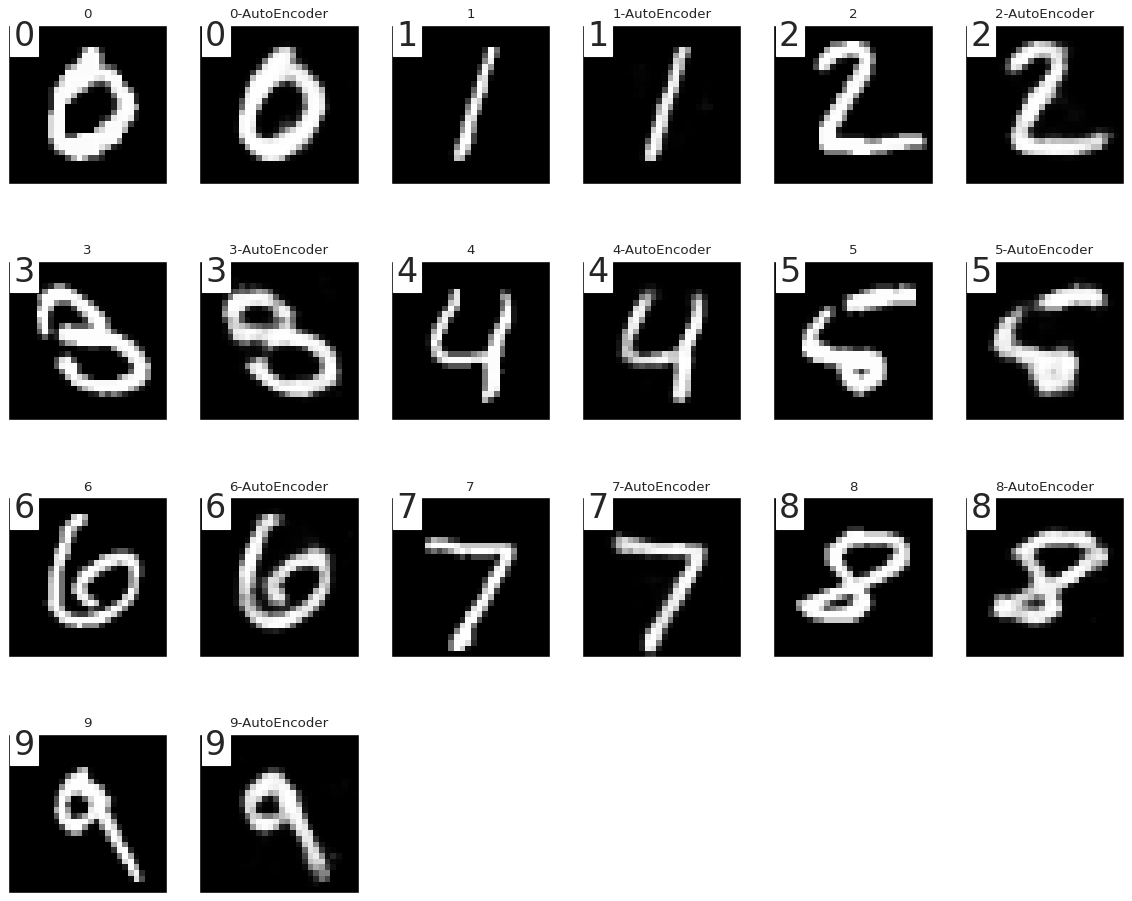

In [ ]:
labels = ['0','1','2','3','4','5','6','7','8','9']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

### Modelo asimétrico

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape

class Autoencoder:
  def __call__(self, shape, E_neu, D_neu, seed=1234):
    tf.random.set_seed(seed)
    self.shape = shape 
    encoder = self.FunEncoder(E_neu)
    decoder = self.FunDecoder(D_neu)
    inputs  = keras.Input(shape=(shape[0],shape[1],))
    x = encoder(inputs)
    x = decoder(x)
    return Model(inputs=inputs, outputs=x)

  def FunEncoder(self, neu=[1024, 512, 256, 128]):
    inputs  = keras.Input(shape=(self.shape[0],self.shape[1],))
    hidden  = Flatten()(inputs)
    for n in neu[:-1]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(neu[-1], activation= 'relu')(hidden)
    return Model(inputs, output)

  def FunDecoder(self, neu=[128, 512, 1024]):
    inputs  = keras.Input(shape=(neu[0],))
    hidden  = Dense(neu[1], activation= 'relu')(inputs)
    for n in neu[2:]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(self.shape[0]*self.shape[1], activation= 'sigmoid')(hidden)
    output  = Reshape(self.shape)(output)
    return Model(inputs, output)
autoencoder = Autoencoder()([28,28], [1024, 512, 256, 128], [128, 512, 1024])
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
model (Functional)           (None, 128)               1492864   
_________________________________________________________________
model_1 (Functional)         (None, 28, 28)            1394960   
Total params: 2,887,824
Trainable params: 2,887,824
Non-trainable params: 0
_________________________________________________________________


In [4]:
#autoencoder = Autoencoder()([28,28], [1024, 512, 256], [256, 512, 1024])
autoencoder = Autoencoder()([28,28], [1024, 512, 256, 128], [128, 512, 1024])
autoencoder.compile(optimizer='adam', loss='mse', metrics=['acc'])
hist1 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst1  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.0228 - acc: 0.2307 - val_loss: 0.0131 - val_acc: 0.2854
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0110 - acc: 0.2849 - val_loss: 0.0104 - val_acc: 0.3031
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0092 - acc: 0.2985 - val_loss: 0.0093 - val_acc: 0.3089
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0083 - acc: 0.3057 - val_loss: 0.0084 - val_acc: 0.3157
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0079 - acc: 0.2986


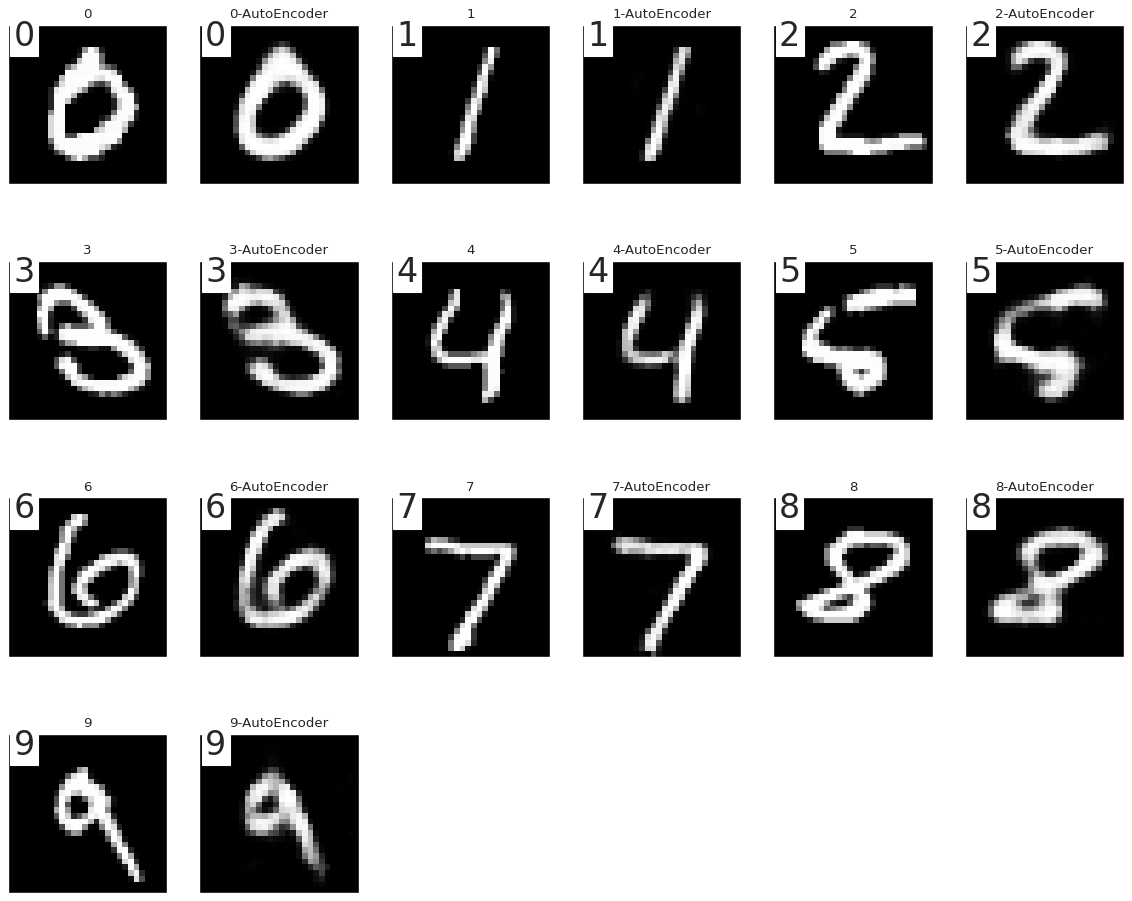

In [5]:
labels = ['0','1','2','3','4','5','6','7','8','9']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

Se puede apreciar que el autoencoder simétrico entrega mejores resultados en cuanto a la visualización de la imagen, lo cual indica mejoras en la reconstrucción de la imagen en el modelo simétrico respecto al modelo asimétrico




## Arquitectura Convolucional

Para esta arquitectura no es necesario usar una capa *Flatten()*. 

### Primer modelo

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, BatchNormalization
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(12345)

encoder = tf.keras.Sequential([
      tf.keras.Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
      ])
decoder = tf.keras.Sequential([
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

inputs = Input(shape=(28, 28, 1))
x = encoder(inputs)
x = decoder(x)
autoencoder = Model(inputs=inputs, outputs=x)

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
hist2 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst2  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.0447 - val_loss: 0.0019
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 9.1416e-04


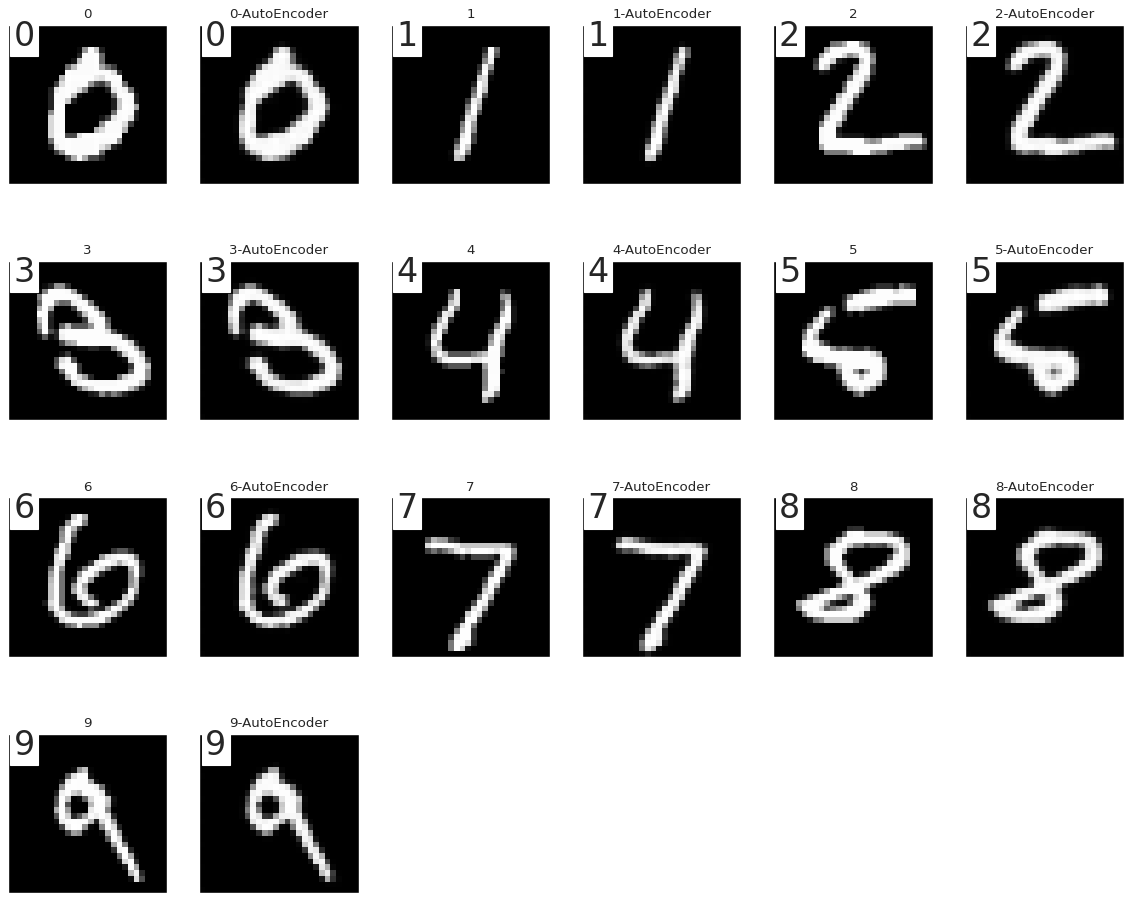

In [ ]:
labels = ['0','1','2','3','4','5','6','7','8','9']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

### Segundo modelo: decoder + 1 capa de salida

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, BatchNormalization
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(12345)

encoder = tf.keras.Sequential([
      tf.keras.Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
      ])
decoder = tf.keras.Sequential([
      Conv2DTranspose(8,  kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(32, kernel_size=3, strides=1, activation='relu', padding='same'),
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'),
      ])

inputs = Input(shape=(28, 28, 1))
x = encoder(inputs)
x = decoder(x)
autoencoder = Model(inputs=inputs, outputs=x)

autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 1)         289 

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
hist2 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=2)
tst2  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1500/1500 - 5s - loss: 0.0100 - val_loss: 0.0014
Epoch 2/5
1500/1500 - 4s - loss: 0.0011 - val_loss: 9.6704e-04
Epoch 3/5
1500/1500 - 4s - loss: 8.5367e-04 - val_loss: 7.8173e-04
Epoch 4/5
1500/1500 - 4s - loss: 7.1035e-04 - val_loss: 6.7100e-04
Epoch 5/5
1500/1500 - 4s - loss: 6.1892e-04 - val_loss: 5.8586e-04
313/313 [==============================] - 1s 3ms/step - loss: 5.7114e-04


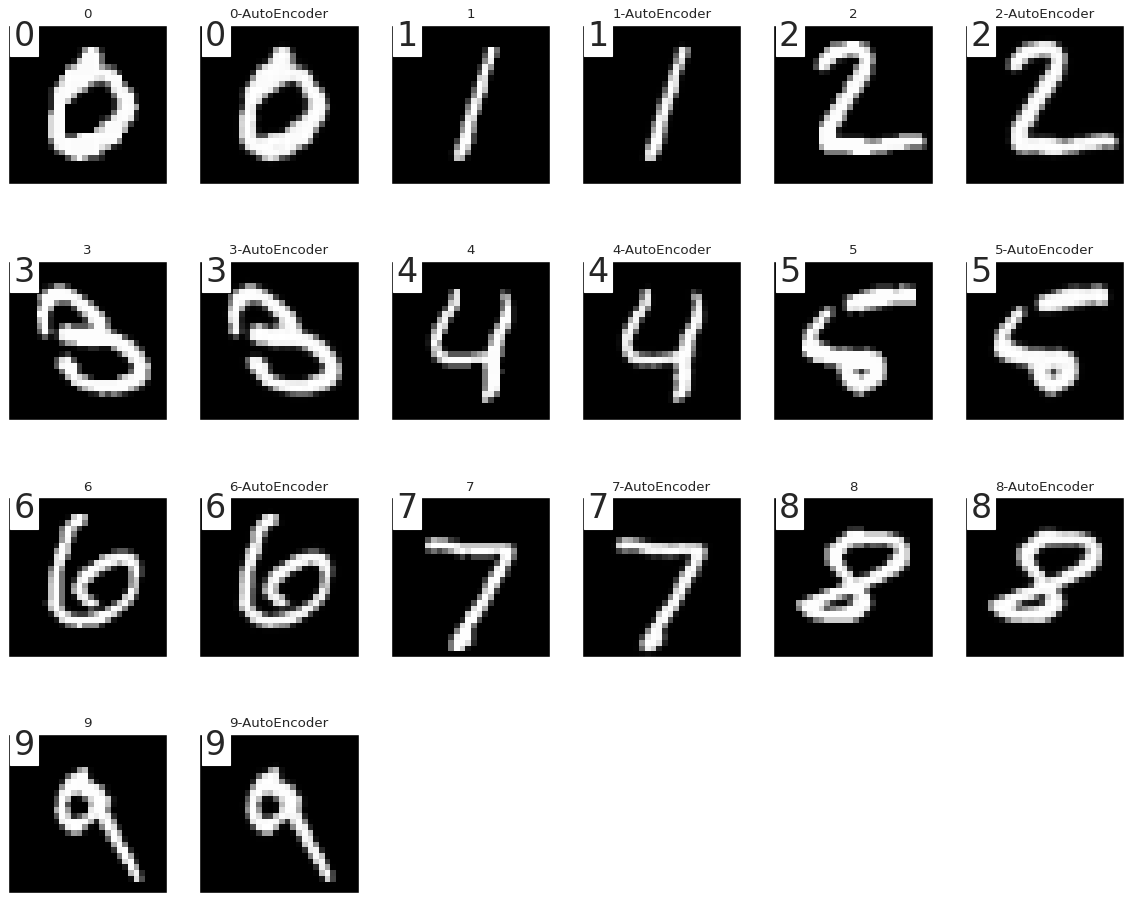

In [ ]:
labels = ['0','1','2','3','4','5','6','7','8','9']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

### Segundo modelo: encoder + 1 capa de salida

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, BatchNormalization
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(12345)

encoder = tf.keras.Sequential([
      tf.keras.Input(shape=(28, 28, 1)), 
      Conv2D(32, (3,3), activation='relu', padding='same', strides=1),
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
      ])
decoder = tf.keras.Sequential([
      Conv2DTranspose(8,  kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'),
      ])

inputs = Input(shape=(28, 28, 1))
x = encoder(inputs)
x = decoder(x)
autoencoder = Model(inputs=inputs, outputs=x)

autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_13 (Conv2DT (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 1)         145 

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
hist2 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst2  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0476 - val_loss: 0.0020
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 9.7070e-04 - val_loss: 8.9639e-04
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 7.7426e-04


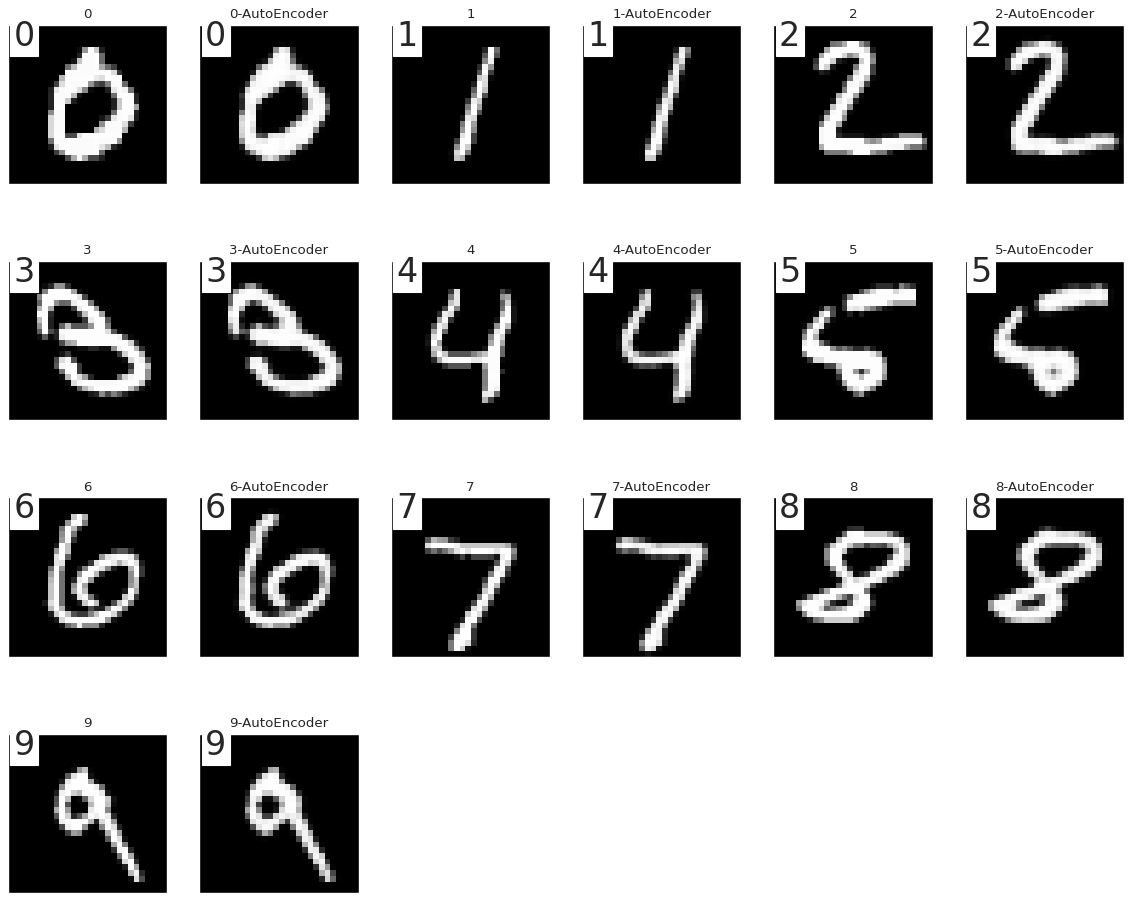

In [ ]:
labels = ['0','1','2','3','4','5','6','7','8','9']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

A diferencia de una red densa, estas rede convolucionales son mejores para trabajar con imagenes, por lo que no se aprecia mucha diferencia respecto a si la red es simétrico o asimétrica.

Para la red asimétrica se realizó la modificación a la red simetica adicionando una capa en el decoder y para otro modelo en el encoder.

# Dataset Fashion MNIST

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


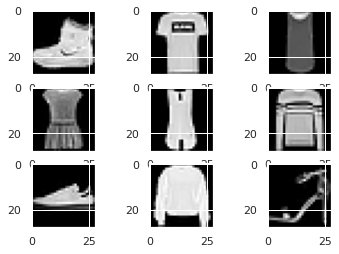

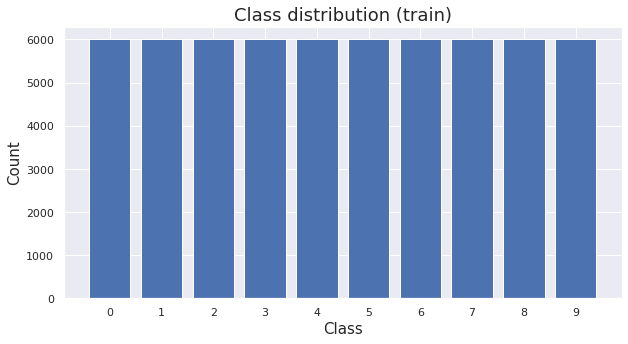

In [ ]:
#from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
targetsShow = y_test
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train2 = X_train.reshape((-1, 28, 28, 1))
X_test2 = X_test.reshape((-1, 28, 28, 1))

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

#escalamos las imágenes de 0 a 1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255


from matplotlib import pyplot
for i in range(9):	
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train2[i][:,:,-1], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# distribucion de ejemplos de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
fig = plt.figure(figsize=(10, 5))
y_pos = np.arange(len(unique))

# Create bars
plt.bar(y_pos, counts)
plt.xticks(y_pos, unique)

plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Class distribution (train)", fontsize=18)
plt.show()


## Arquitectura Densa

### Modelo simétrico

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape

class Autoencoder:
  def __call__(self, shape, E_neu, D_neu, seed=1234):
    tf.random.set_seed(seed)
    self.shape = shape 
    encoder = self.FunEncoder(E_neu)
    decoder = self.FunDecoder(D_neu)
    inputs  = keras.Input(shape=(shape[0],shape[1],))
    x = encoder(inputs)
    x = decoder(x)
    return Model(inputs=inputs, outputs=x)

  def FunEncoder(self, neu=[1024, 512, 256]):
    inputs  = keras.Input(shape=(self.shape[0],self.shape[1],))
    hidden  = Flatten()(inputs)
    for n in neu[:-1]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(neu[-1], activation= 'relu')(hidden)
    return Model(inputs, output)

  def FunDecoder(self, neu=[256, 512, 1024]):
    inputs  = keras.Input(shape=(neu[0],))
    hidden  = Dense(neu[1], activation= 'relu')(inputs)
    for n in neu[2:]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(self.shape[0]*self.shape[1], activation= 'sigmoid')(hidden)
    output  = Reshape(self.shape)(output)
    return Model(inputs, output)
autoencoder = Autoencoder()([28,28], [1024, 512, 256], [256, 512, 1024])
autoencoder.summary()

Model: "model_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_54 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
model_45 (Functional)        (None, 256)               1459968   
_________________________________________________________________
model_46 (Functional)        (None, 28, 28)            1460496   
Total params: 2,920,464
Trainable params: 2,920,464
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder = Autoencoder()([28,28], [1024, 512, 256], [256, 512, 1024])
autoencoder.compile(optimizer='adam', loss='mse', metrics=['acc'])
hist1 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst1  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0212 - acc: 0.1215 - val_loss: 0.0145 - val_acc: 0.1434
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0131 - acc: 0.1674 - val_loss: 0.0119 - val_acc: 0.1830
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0115 - acc: 0.1906 - val_loss: 0.0111 - val_acc: 0.1969
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0107 - acc: 0.2044 - val_loss: 0.0107 - val_acc: 0.2038
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0102 - acc: 0.2184


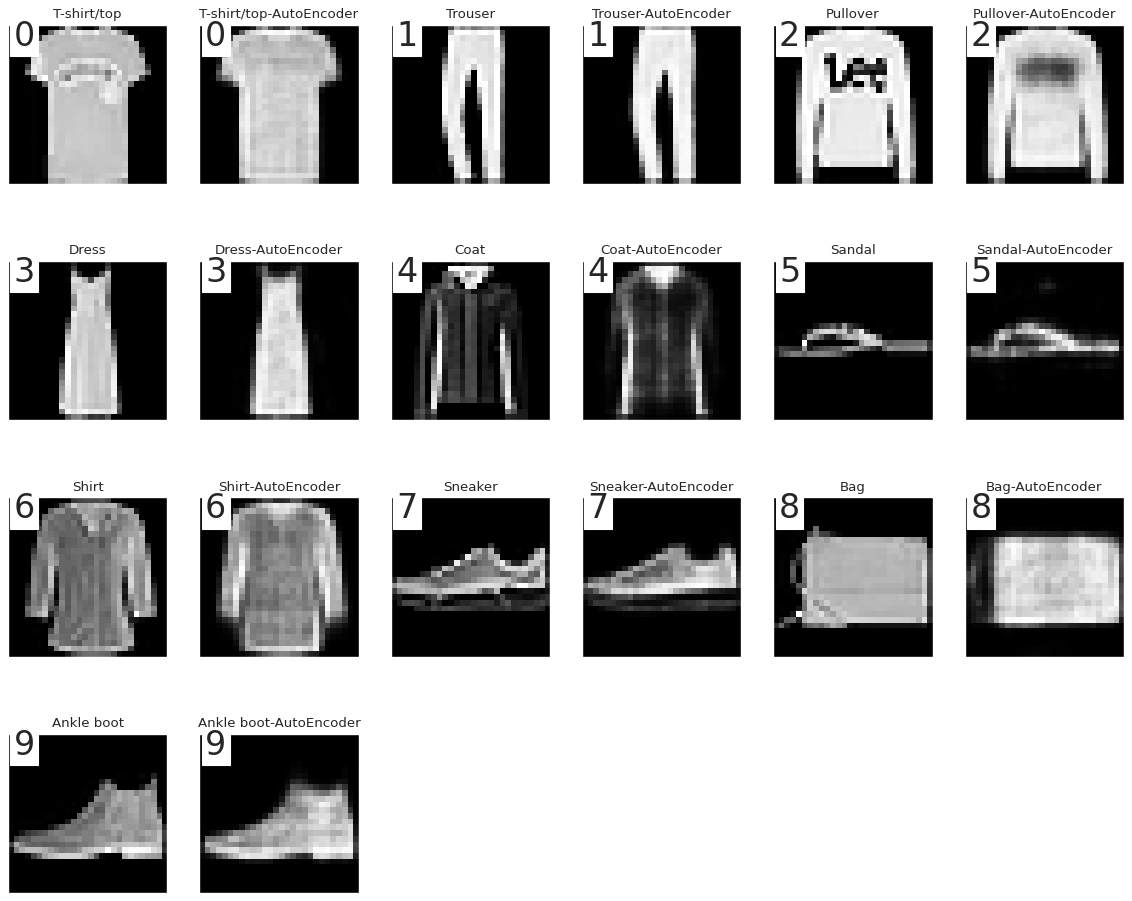

In [ ]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

### Modelo asimétrico

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape

class Autoencoder:
  def __call__(self, shape, E_neu, D_neu, seed=1234):
    tf.random.set_seed(seed)
    self.shape = shape 
    encoder = self.FunEncoder(E_neu)
    decoder = self.FunDecoder(D_neu)
    inputs  = keras.Input(shape=(shape[0],shape[1],))
    x = encoder(inputs)
    x = decoder(x)
    return Model(inputs=inputs, outputs=x)

  def FunEncoder(self, neu=[1024, 512, 256, 128]):
    inputs  = keras.Input(shape=(self.shape[0],self.shape[1],))
    hidden  = Flatten()(inputs)
    for n in neu[:-1]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(neu[-1], activation= 'relu')(hidden)
    return Model(inputs, output)

  def FunDecoder(self, neu=[128, 512, 1024]):
    inputs  = keras.Input(shape=(neu[0],))
    hidden  = Dense(neu[1], activation= 'relu')(inputs)
    for n in neu[2:]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(self.shape[0]*self.shape[1], activation= 'sigmoid')(hidden)
    output  = Reshape(self.shape)(output)
    return Model(inputs, output)
autoencoder = Autoencoder()([28,28], [1024, 512, 256, 128], [128, 512, 1024])
autoencoder.summary()

Model: "model_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_60 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
model_51 (Functional)        (None, 128)               1492864   
_________________________________________________________________
model_52 (Functional)        (None, 28, 28)            1394960   
Total params: 2,887,824
Trainable params: 2,887,824
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#autoencoder = Autoencoder()([28,28], [1024, 512, 256], [256, 512, 1024])
autoencoder = Autoencoder()([28,28], [1024, 512, 256, 128], [128, 512, 1024])
autoencoder.compile(optimizer='adam', loss='mse', metrics=['acc'])
hist1 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst1  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0226 - acc: 0.1127 - val_loss: 0.0161 - val_acc: 0.1327
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0146 - acc: 0.1555 - val_loss: 0.0139 - val_acc: 0.1663
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0129 - acc: 0.1765 - val_loss: 0.0126 - val_acc: 0.1801
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0119 - acc: 0.1892 - val_loss: 0.0121 - val_acc: 0.1930
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0114 - acc: 0.2054


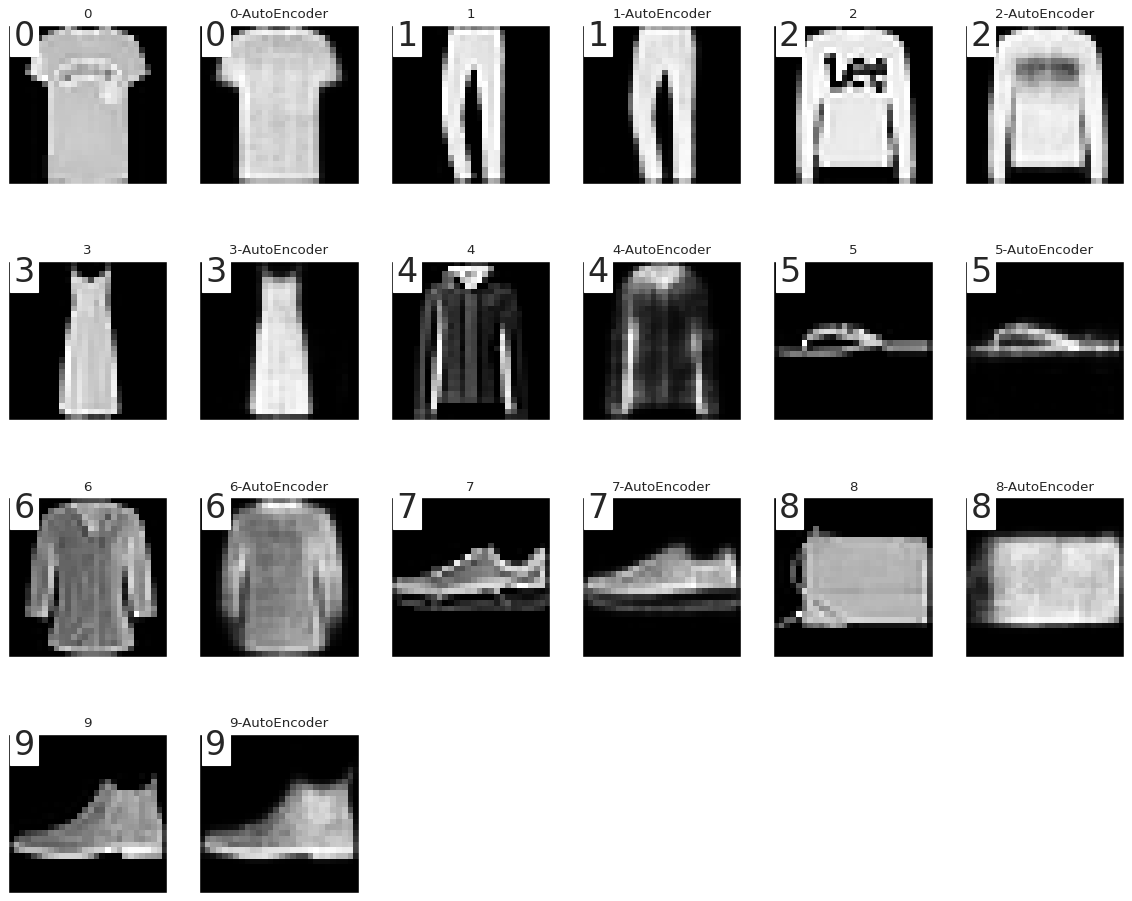

In [ ]:
labels = ['0','1','2','3','4','5','6','7','8','9']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

## Arquitectura convolucional

### Primer modelo

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, BatchNormalization
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(12345)

encoder = tf.keras.Sequential([
      tf.keras.Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
      ])
decoder = tf.keras.Sequential([
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

inputs = Input(shape=(28, 28, 1))
x = encoder(inputs)
x = decoder(x)
autoencoder = Model(inputs=inputs, outputs=x)

autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_14 (Conv2DT (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_15 (Conv2DT (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
hist2 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst2  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.0372 - val_loss: 0.0075
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0069 - val_loss: 0.0052
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0032


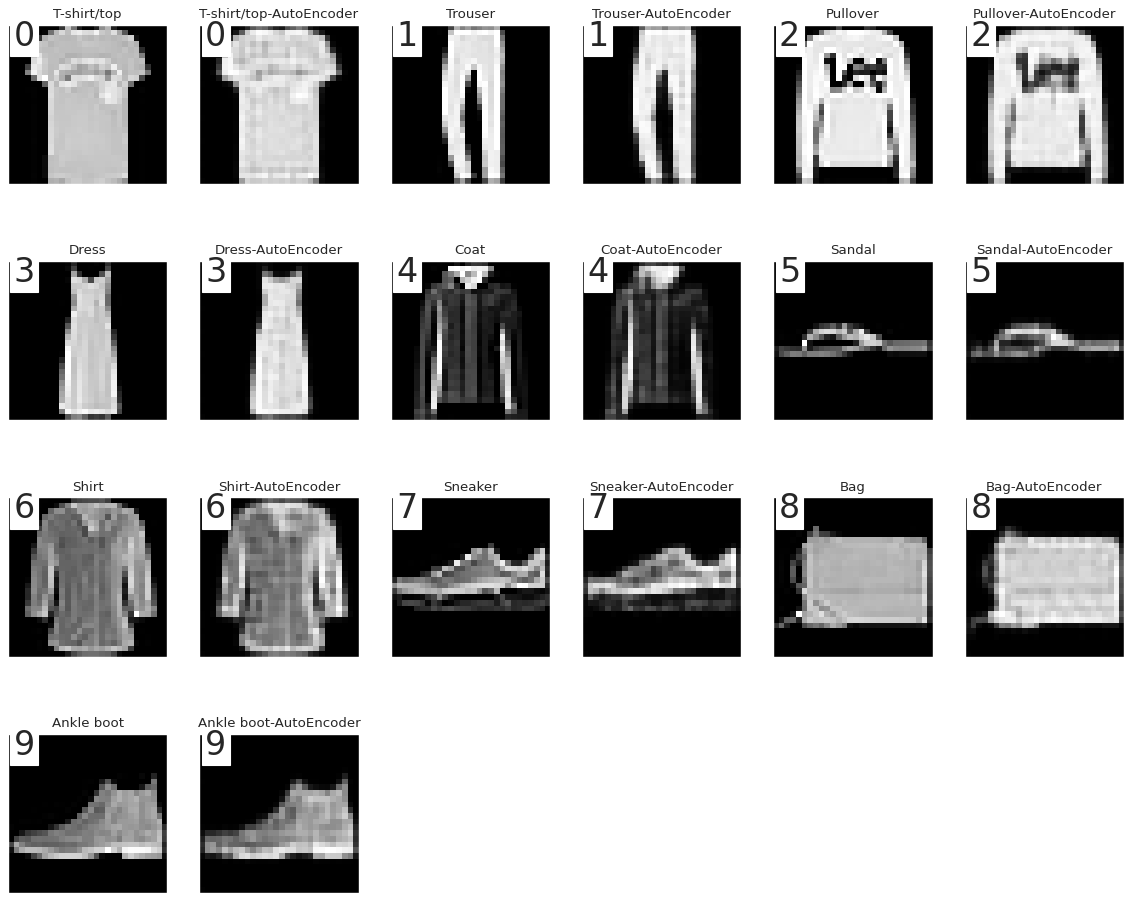

In [ ]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

### Segundo modelo: decoder + 1 capa de salida

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, BatchNormalization
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(12345)

encoder = tf.keras.Sequential([
      tf.keras.Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
      ])
decoder = tf.keras.Sequential([
      Conv2DTranspose(8,  kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(32, kernel_size=3, strides=1, activation='relu', padding='same'),
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'),
      ])

inputs = Input(shape=(28, 28, 1))
x = encoder(inputs)
x = decoder(x)
autoencoder = Model(inputs=inputs, outputs=x)

autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_16 (Conv2DT (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_17 (Conv2DT (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_transpose_18 (Conv2DT (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 1)         289 

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
hist2 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=2)
tst2  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1500/1500 - 6s - loss: 0.0135 - val_loss: 0.0058
Epoch 2/5
1500/1500 - 5s - loss: 0.0049 - val_loss: 0.0041
Epoch 3/5
1500/1500 - 4s - loss: 0.0038 - val_loss: 0.0034
Epoch 4/5
1500/1500 - 4s - loss: 0.0033 - val_loss: 0.0030
Epoch 5/5
1500/1500 - 4s - loss: 0.0029 - val_loss: 0.0031
313/313 [==============================] - 1s 3ms/step - loss: 0.0031


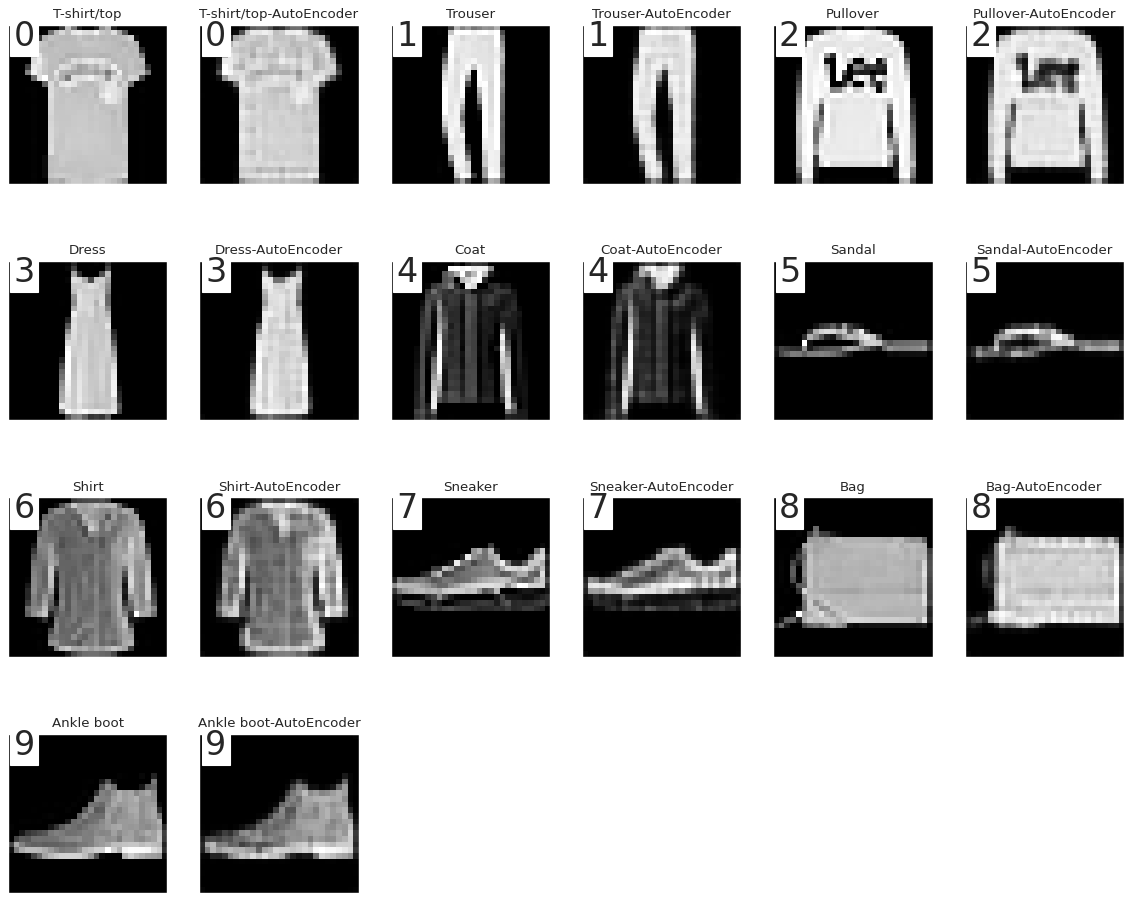

In [ ]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

### Segundo modelo: encoder + 1 capa de salida

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, BatchNormalization
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(12345)

encoder = tf.keras.Sequential([
      tf.keras.Input(shape=(28, 28, 1)), 
      Conv2D(32, (3,3), activation='relu', padding='same', strides=1),
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
      ])
decoder = tf.keras.Sequential([
      Conv2DTranspose(8,  kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'),
      ])

inputs = Input(shape=(28, 28, 1))
x = encoder(inputs)
x = decoder(x)
autoencoder = Model(inputs=inputs, outputs=x)

autoencoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_19 (Conv2DT (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_20 (Conv2DT (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 1)         145 

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
hist2 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst2  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0352 - val_loss: 0.0058
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0026


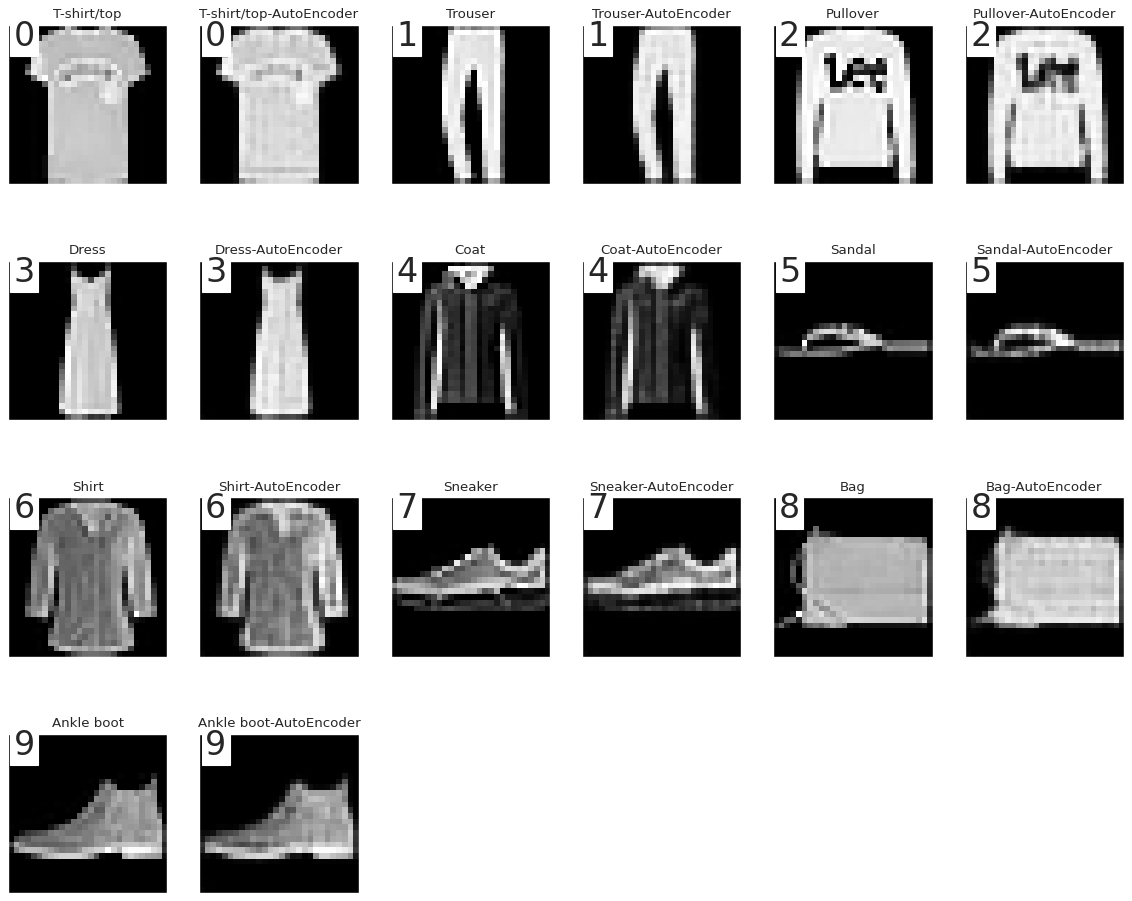

In [ ]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

Los resultados obtenidos con este dataset son similares a los obtenidos anteriormente con el dataset MNIST.

# Dataset CIFAR-10


(50000, 32, 32, 3)
(50000, 32, 32)
(50000, 28, 28) 

(10000, 32, 32, 3)
(10000, 32, 32)
(10000, 28, 28) 



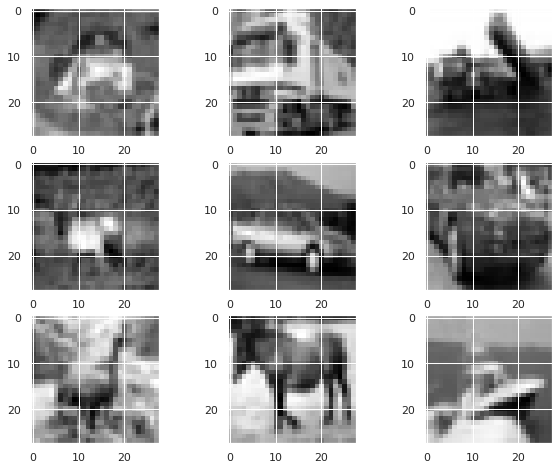

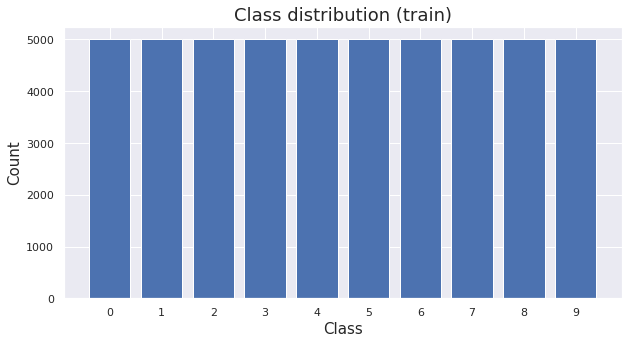

In [ ]:
from keras.datasets import cifar10
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
(trainX, y_train), (testX, y_test) = cifar10.load_data()

print(trainX.shape)
Xtrain = tf.image.rgb_to_grayscale(trainX).numpy()[:,:,:,0]
print(Xtrain.shape)
xtr  = []
for k in Xtrain:
  xtr.append(np.array(Image.fromarray(k, 'L').resize((28,28)).getdata()).reshape(28,28))
X_train = np.array(xtr)
print(X_train.shape,'\n')

print(testX.shape)
Xtst = tf.image.rgb_to_grayscale(testX).numpy()[:,:,:,0]
print(Xtst.shape)
xtst = []
for k in Xtst:
  xtst.append(np.array(Image.fromarray(k, 'L').resize((28,28)).getdata()).reshape(28,28))
X_test = np.array(xtst)
print(X_test.shape,'\n')

from matplotlib import pyplot
pyplot.figure(figsize=(10,8))
for i in range(9):	
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# distribucion de ejemplos de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
fig = plt.figure(figsize=(10, 5))
y_pos = np.arange(len(unique))

# Create bars
plt.bar(y_pos, counts)
plt.xticks(y_pos, unique)

plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Class distribution (train)", fontsize=18)
plt.show()



#escalamos las imágenes de 0 a 1
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

El código para cada imagen es el siguiente:

0 : Airplane \\
1 : Automobile \\
2 : Bird \\
3 : Cat \\
4 : Deer \\
5 : Dog \\
6 : Frog \\
7 : Horse \\
8 : Ship \\
9 : Truck \\

## Arquitectura Densa

### Modelo simétrico

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape

class Autoencoder:
  def __call__(self, shape, E_neu, D_neu, seed=1234):
    tf.random.set_seed(seed)
    self.shape = shape 
    encoder = self.FunEncoder(E_neu)
    decoder = self.FunDecoder(D_neu)
    inputs  = keras.Input(shape=(shape[0],shape[1],))
    x = encoder(inputs)
    x = decoder(x)
    return Model(inputs=inputs, outputs=x)

  def FunEncoder(self, neu=[1024, 512, 256]):
    inputs  = keras.Input(shape=(self.shape[0],self.shape[1],))
    hidden  = Flatten()(inputs)
    for n in neu[:-1]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(neu[-1], activation= 'relu')(hidden)
    return Model(inputs, output)

  def FunDecoder(self, neu=[256, 512, 1024]):
    inputs  = keras.Input(shape=(neu[0],))
    hidden  = Dense(neu[1], activation= 'relu')(inputs)
    for n in neu[2:]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(self.shape[0]*self.shape[1], activation= 'sigmoid')(hidden)
    output  = Reshape(self.shape)(output)
    return Model(inputs, output)
autoencoder = Autoencoder()([28,28], [1024, 512, 256], [256, 512, 1024])
autoencoder.summary()

Model: "model_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_91 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
model_75 (Functional)        (None, 256)               1459968   
_________________________________________________________________
model_76 (Functional)        (None, 28, 28)            1460496   
Total params: 2,920,464
Trainable params: 2,920,464
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder = Autoencoder()([28,28], [1024, 512, 256], [256, 512, 1024])
autoencoder.compile(optimizer='adam', loss='mse', metrics=['acc'])
hist1 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst1  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0210 - acc: 0.1111 - val_loss: 0.0143 - val_acc: 0.1320
Epoch 2/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0133 - acc: 0.1370 - val_loss: 0.0120 - val_acc: 0.1367
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0114 - acc: 0.1488 - val_loss: 0.0107 - val_acc: 0.1446
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0104 - acc: 0.1566 - val_loss: 0.0098 - val_acc: 0.1552
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0097 - acc: 0.1541


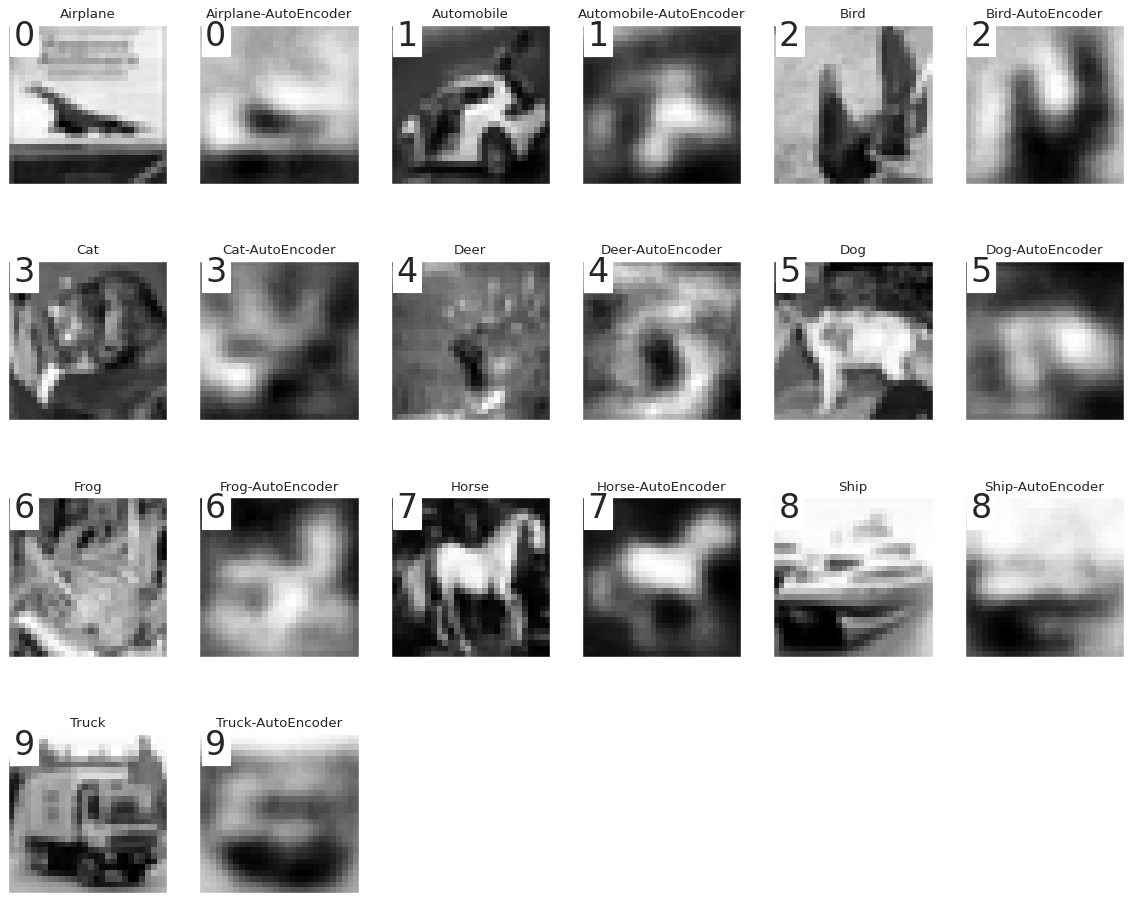

In [ ]:

labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

### Modelo asimétrico

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape

class Autoencoder:
  def __call__(self, shape, E_neu, D_neu, seed=1234):
    tf.random.set_seed(seed)
    self.shape = shape 
    encoder = self.FunEncoder(E_neu)
    decoder = self.FunDecoder(D_neu)
    inputs  = keras.Input(shape=(shape[0],shape[1],))
    x = encoder(inputs)
    x = decoder(x)
    return Model(inputs=inputs, outputs=x)

  def FunEncoder(self, neu=[1024, 512, 256, 128]):
    inputs  = keras.Input(shape=(self.shape[0],self.shape[1],))
    hidden  = Flatten()(inputs)
    for n in neu[:-1]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(neu[-1], activation= 'relu')(hidden)
    return Model(inputs, output)

  def FunDecoder(self, neu=[128, 512, 1024]):
    inputs  = keras.Input(shape=(neu[0],))
    hidden  = Dense(neu[1], activation= 'relu')(inputs)
    for n in neu[2:]:
      hidden  = Dense(n, activation= 'relu')(hidden)
    output  = Dense(self.shape[0]*self.shape[1], activation= 'sigmoid')(hidden)
    output  = Reshape(self.shape)(output)
    return Model(inputs, output)
autoencoder = Autoencoder()([28,28], [1024, 512, 256, 128], [128, 512, 1024])
autoencoder.summary()

Model: "model_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_75 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
model_63 (Functional)        (None, 128)               1492864   
_________________________________________________________________
model_64 (Functional)        (None, 28, 28)            1394960   
Total params: 2,887,824
Trainable params: 2,887,824
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#autoencoder = Autoencoder()([28,28], [1024, 512, 256], [256, 512, 1024])
autoencoder = Autoencoder()([28,28], [1024, 512, 256, 128], [128, 512, 1024])
autoencoder.compile(optimizer='adam', loss='mse', metrics=['acc'])
hist1 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst1  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0230 - acc: 0.1062 - val_loss: 0.0171 - val_acc: 0.1146
Epoch 2/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0163 - acc: 0.1226 - val_loss: 0.0145 - val_acc: 0.1217
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0140 - acc: 0.1333 - val_loss: 0.0134 - val_acc: 0.1357
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0132 - acc: 0.1357 - val_loss: 0.0130 - val_acc: 0.1383
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0124 - acc: 0.1381


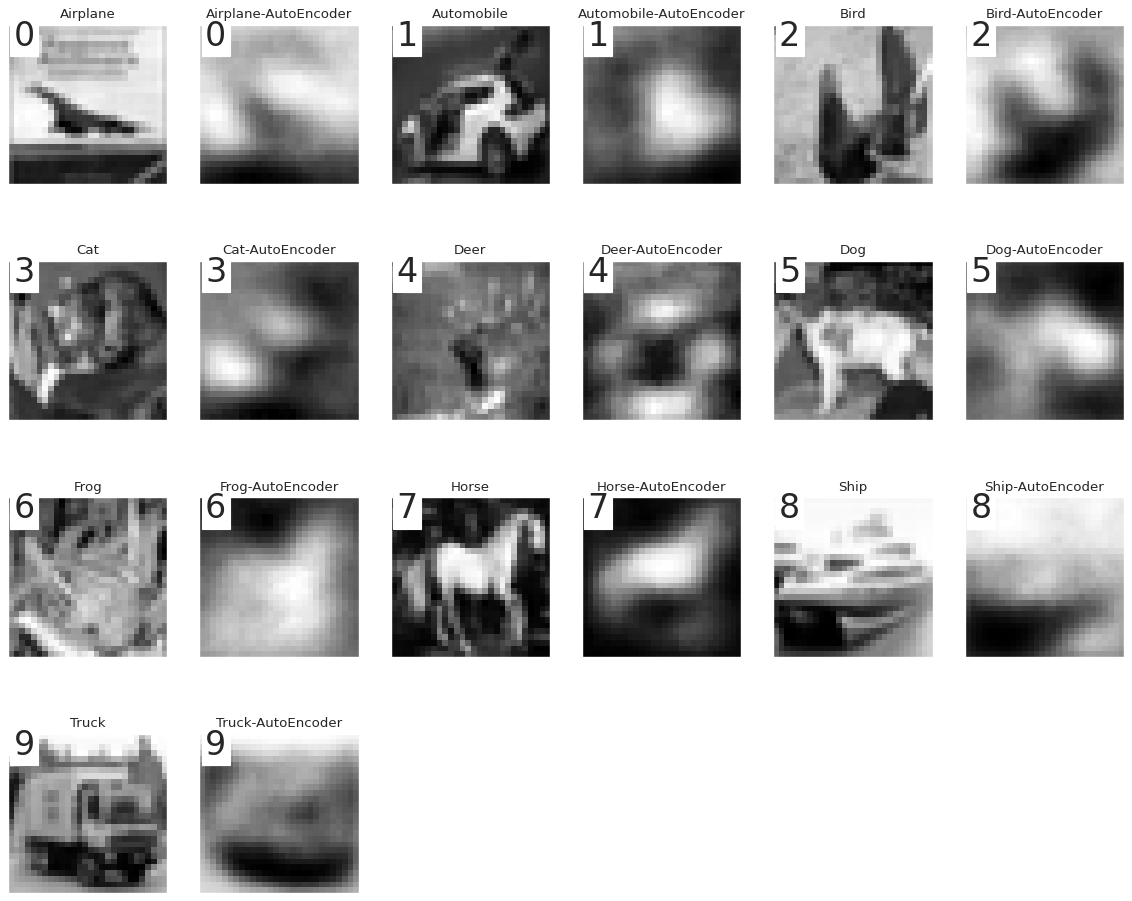

In [ ]:
labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

No se aprecia de buena forma la diferencia entre ambas arquitecturas, ya que la red densa no es muy adecuada para trabajar con imagenes de esta envergadura.

## Arquitectura Convolucional

### Primer modelo

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, BatchNormalization
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(12345)

encoder = tf.keras.Sequential([
      tf.keras.Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
      ])
decoder = tf.keras.Sequential([
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

inputs = Input(shape=(28, 28, 1))
x = encoder(inputs)
x = decoder(x)
autoencoder = Model(inputs=inputs, outputs=x)

autoencoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_21 (Conv2DT (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_22 (Conv2DT (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
hist2 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst2  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1250/1250 [==============================] - 5s 3ms/step - loss: 0.0158 - val_loss: 0.0032
Epoch 2/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0013


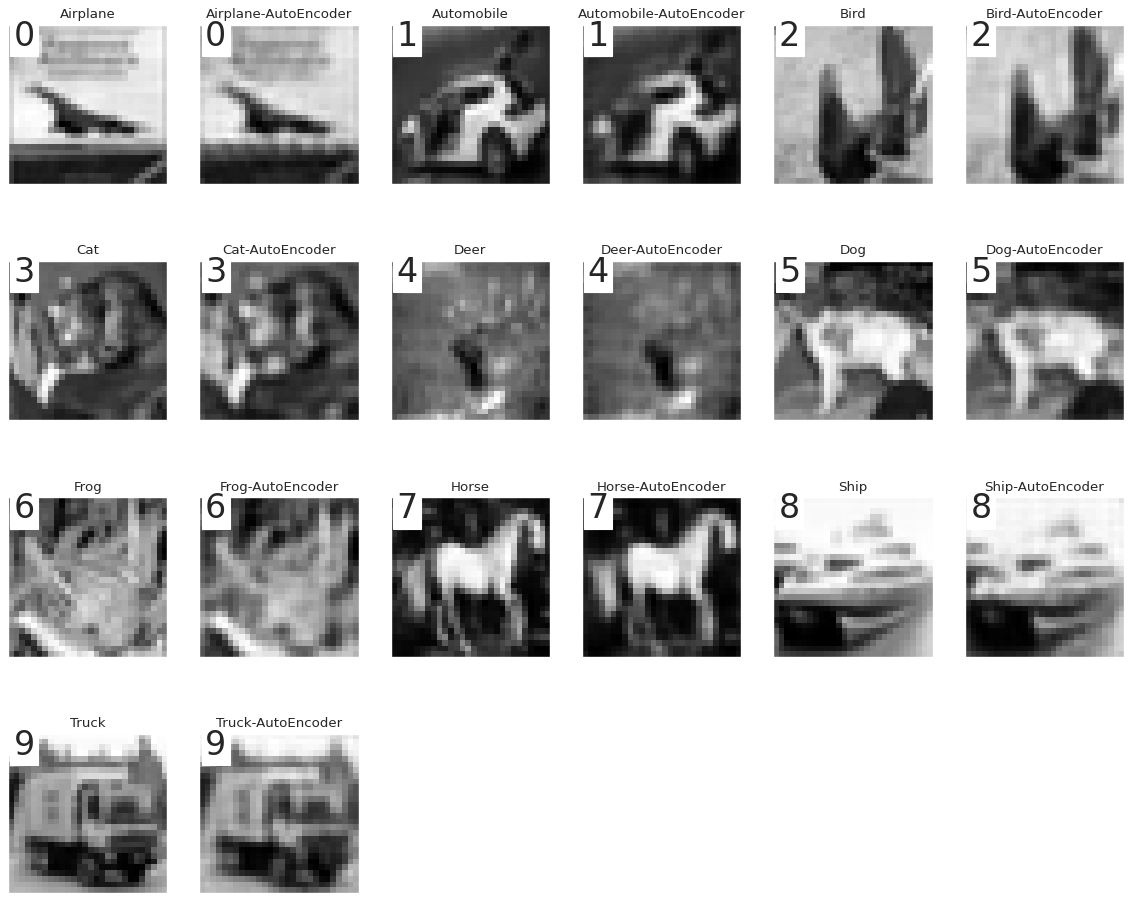

In [ ]:
labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

### Segundo modelo: decoder + 1 capa de salida

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, BatchNormalization
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(12345)

encoder = tf.keras.Sequential([
      tf.keras.Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
      ])
decoder = tf.keras.Sequential([
      Conv2DTranspose(8,  kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(32, kernel_size=3, strides=1, activation='relu', padding='same'),
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'),
      ])

inputs = Input(shape=(28, 28, 1))
x = encoder(inputs)
x = decoder(x)
autoencoder = Model(inputs=inputs, outputs=x)

autoencoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_26 (Conv2DT (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_27 (Conv2DT (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_transpose_28 (Conv2DT (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 1)         289

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
hist2 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=2)
tst2  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1250/1250 - 5s - loss: 0.0057 - val_loss: 0.0028
Epoch 2/5
1250/1250 - 4s - loss: 0.0025 - val_loss: 0.0021
Epoch 3/5
1250/1250 - 4s - loss: 0.0019 - val_loss: 0.0016
Epoch 4/5
1250/1250 - 4s - loss: 0.0015 - val_loss: 0.0014
Epoch 5/5
1250/1250 - 4s - loss: 0.0013 - val_loss: 0.0012
313/313 [==============================] - 1s 2ms/step - loss: 0.0012


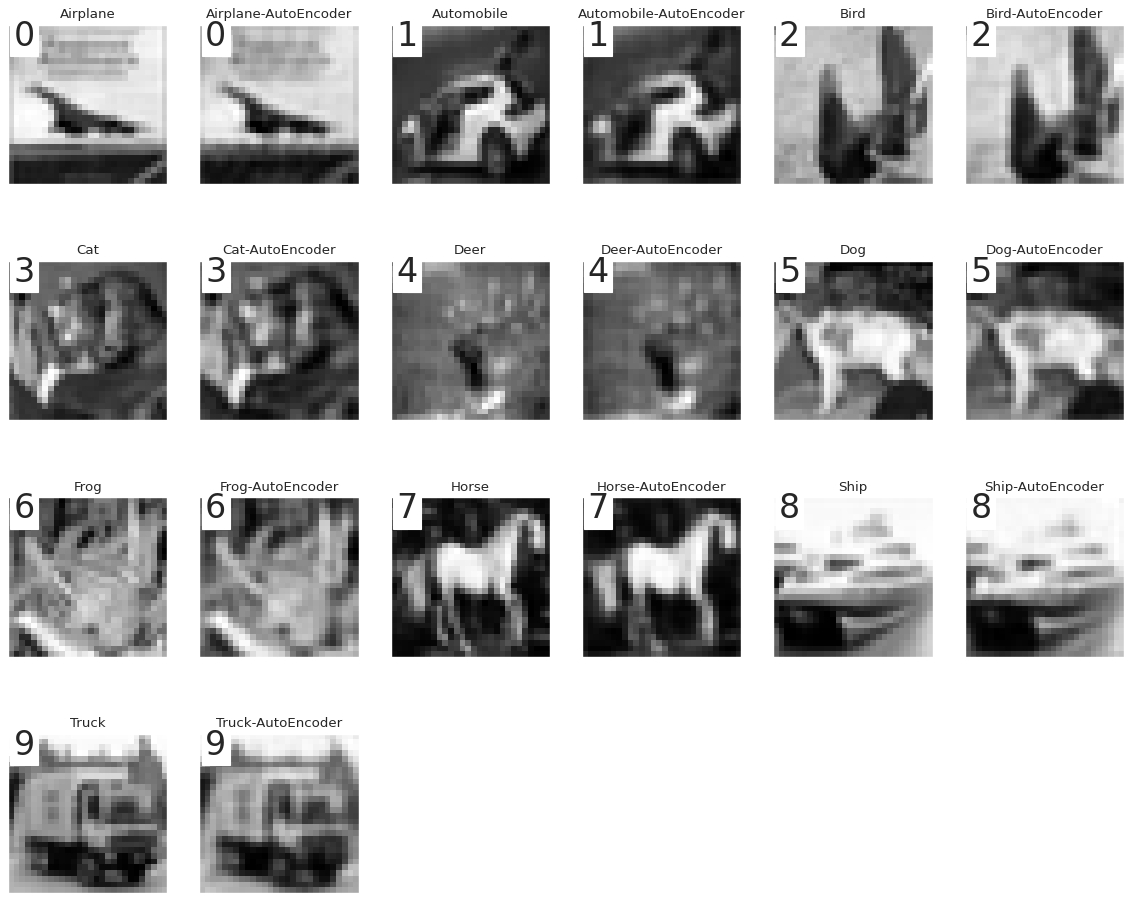

In [ ]:
labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

### Segundo modelo: encoder + 1 capa de salida

In [ ]:
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, BatchNormalization
from keras.models import Model
import tensorflow as tf
tf.random.set_seed(12345)

encoder = tf.keras.Sequential([
      tf.keras.Input(shape=(28, 28, 1)), 
      Conv2D(32, (3,3), activation='relu', padding='same', strides=1),
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)
      ])
decoder = tf.keras.Sequential([
      Conv2DTranspose(8,  kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'),
      ])

inputs = Input(shape=(28, 28, 1))
x = encoder(inputs)
x = decoder(x)
autoencoder = Model(inputs=inputs, outputs=x)

autoencoder.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_29 (Conv2DT (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_30 (Conv2DT (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 28, 28, 1)         145

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')
hist2 = autoencoder.fit(X_train, X_train, epochs=5, validation_split=0.2, verbose=1)
tst2  = autoencoder.evaluate(X_test, X_test)

Epoch 1/5
1250/1250 [==============================] - 6s 4ms/step - loss: 0.0142 - val_loss: 0.0022
Epoch 2/5
1250/1250 [==============================] - 4s 4ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0010


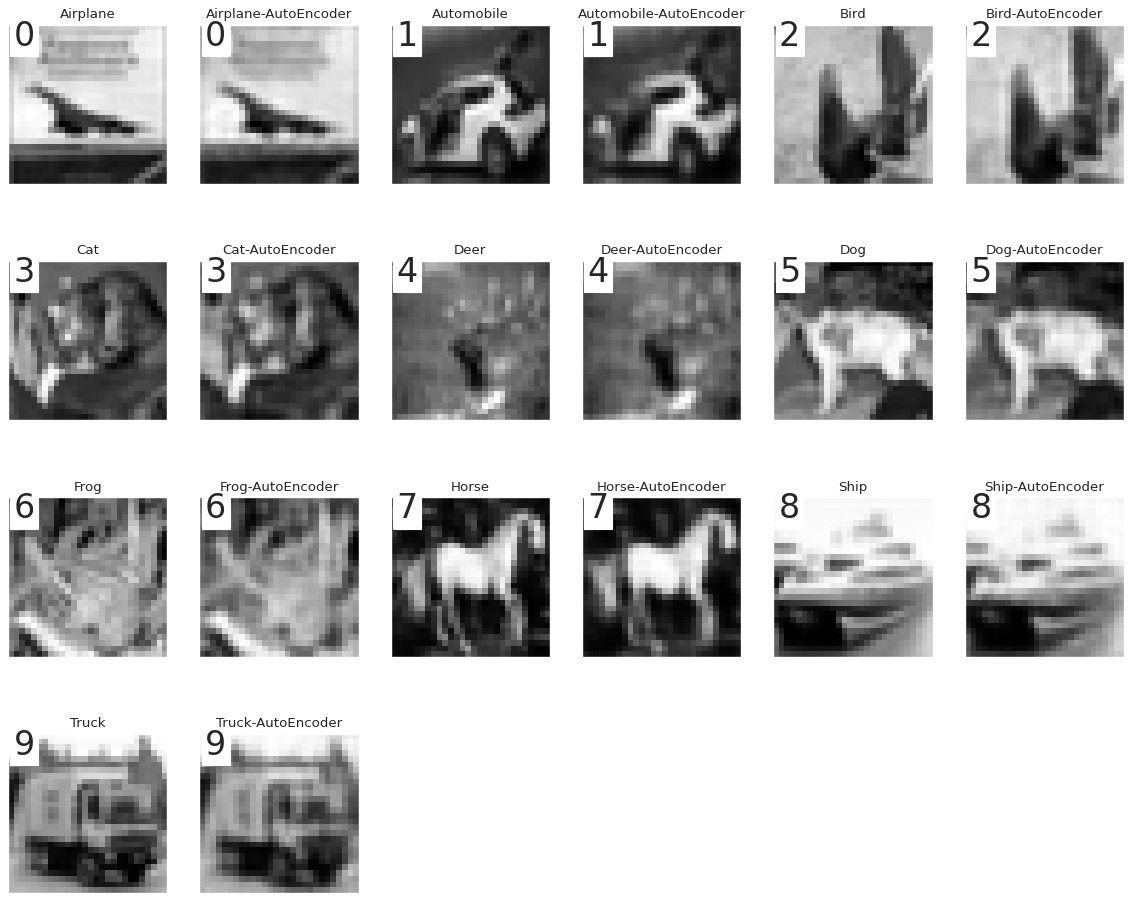

In [ ]:
labels = ['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
fig = plt.figure(figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
gs  = gridspec.GridSpec(nrows=4, ncols=6)
conty=0
for Class in range(10):
  x1 = X_test[np.where(y_test==Class)[0][0]]
  y1 = autoencoder(np.array([x1]))

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(x1, cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class])
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1

  ax = plt.subplot(gs[conty//6, conty%6])
  ax.imshow(y1.numpy().reshape(28,28), cmap = "gray") 
  ax.text(0.5, 3.2, str(Class), bbox={'facecolor': 'white', 'pad': 3}, fontsize=30)
  ax.title.set_text(labels[Class]+'-AutoEncoder')
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  conty+=1
plt.show()

Si bien los resultados obtenidos para este dataset no son muy concluyentes respecto a la hipotesis de este trabajo, se aprecia una leve diferencia respecto a los modelos, donde el modelo simétrico presenta mejores resultados en la reconstrucción de imágenes.



De forma general se obtuvo que la red simétrica tanto para una aquitectura densa como para una convolucional, presento mejores resultados en cuanto a la reconstrucción de las imágenes, pero se cree que planteando una red mucho más asimétrica se obtendrían resultados más concluyentes al respecto de cual arquitectura de red es mejor para un autoencoder.